In [1]:
import pandas as pd
import reverse_geocode
import matplotlib.pyplot as plt
import numpy as np

In [2]:
colNames = ['drop','track_id']

In [3]:
len(colNames)

2

# read the file with trackid information

In [4]:
songs_df = pd.read_csv('files/moreFeaturesTrackID.csv', index_col=False, encoding='iso-8859-1', header = None)

In [5]:
songs_df.head()

,0,1
0,0,TRCCCRP128F147BEFA
1,1,TRCCCDI128F427CC1F
2,2,TRCCCMQ128F42AE752
3,3,TRCCCJT128F429FFF6
4,4,TRCCCAQ128E079937C


In [6]:
songs_df.shape

(433323, 2)

In [7]:
songs_df.columns = colNames

In [8]:
songs_df.drop('drop', axis = 1, inplace=True)

In [9]:
colNames = ['year', 'artist_name', 'artist_id', 'song_title', 'song_beats_persecond', 'song_duration', 'song_end_fade_in', 'song_start_fade_out', 'song_key', 'song_loudness', 'song_loudness_max', 'song_loudness_min', 'song_loudness_med', 'song_loudness_time_max', 'song_loudness_time_min', 'song_loudness_time_med', 'song_mode', 'song_tempo', 'song_time_signature', 'pitch0', 'pitch1', 'pitch2', 'pitch3', 'pitch4', 'pitch5', 'pitch6', 'pitch7', 'pitch8', 'pitch9', 'pitch10', 'pitch11', 'pitch12', 'pitch13', 'pitch14', 'pitch15', 'pitch16', 'pitch17', 'pitch18', 'pitch19', 'pitch20', 'pitch21', 'pitch22', 'pitch23', 'pitch24', 'pitch25', 'pitch26', 'pitch27', 'pitch28', 'pitch29', 'pitch30', 'pitch31', 'pitch32', 'pitch33', 'pitch34', 'pitch35', 'pitch36', 'pitch37', 'pitch38', 'pitch39', 'pitch40', 'pitch41', 'pitch42', 'pitch43', 'pitch44', 'pitch45', 'pitch46', 'pitch47', 'pitch48', 'pitch49', 'pitch50', 'pitch51', 'pitch52', 'pitch53', 'pitch54', 'pitch55', 'pitch56', 'pitch57', 'pitch58', 'pitch59', 'pitch60', 'pitch61', 'pitch62', 'pitch63', 'pitch64', 'pitch65', 'pitch66', 'pitch67', 'pitch68', 'pitch69', 'pitch70', 'pitch71', 'pitch72', 'pitch73', 'pitch74', 'pitch75', 'pitch76', 'pitch77', 'pitch78', 'pitch79', 'pitch80', 'pitch81', 'pitch82', 'pitch83', 'pitch84', 'pitch85', 'pitch86', 'pitch87', 'pitch88', 'pitch89', 'timbre0', 'timbre1', 'timbre2', 'timbre3', 'timbre4', 'timbre5', 'timbre6', 'timbre7', 'timbre8', 'timbre9', 'timbre10', 'timbre11', 'timbre12', 'timbre13', 'timbre14', 'timbre15', 'timbre16', 'timbre17', 'timbre18', 'timbre19', 'timbre20', 'timbre21', 'timbre22', 'timbre23', 'timbre24', 'timbre25', 'timbre26', 'timbre27', 'timbre28', 'timbre29', 'timbre30', 'timbre31', 'timbre32', 'timbre33', 'timbre34', 'timbre35', 'timbre36', 'timbre37', 'timbre38', 'timbre39', 'timbre40', 'timbre41', 'timbre42', 'timbre43', 'timbre44', 'timbre45', 'timbre46', 'timbre47', 'timbre48', 'timbre49', 'timbre50', 'timbre51', 'timbre52', 'timbre53', 'timbre54', 'timbre55', 'timbre56', 'timbre57', 'timbre58', 'timbre59', 'timbre60', 'timbre61', 'timbre62', 'timbre63', 'timbre64', 'timbre65', 'timbre66', 'timbre67', 'timbre68', 'timbre69', 'timbre70', 'timbre71', 'timbre72', 'timbre73', 'timbre74', 'timbre75', 'timbre76', 'timbre77', 'timbre78', 'timbre79', 'timbre80', 'timbre81', 'timbre82', 'timbre83', 'timbre84', 'timbre85', 'timbre86', 'timbre87', 'timbre88', 'timbre89']

In [10]:
all_songs_df = pd.read_csv('write_clean.csv', index_col=False, encoding='iso-8859-1', header = None)
all_songs_df.columns = colNames
all_songs_df.shape

(433323, 199)

In [11]:
all_songs_df.head()

,year,artist_name,artist_id,song_title,song_beats_persecond,song_duration,song_end_fade_in,song_start_fade_out,song_key,song_loudness,...,timbre80,timbre81,timbre82,timbre83,timbre84,timbre85,timbre86,timbre87,timbre88,timbre89
0,1995,Baka Beyond,ARE93YV1187B9937CC,Journey (Album Version),2.279004,368.14322,0.000,358.905,9,-11.482,...,3.752557,7.258691,8.160899,-15.233542,-1.005168,-11.963544,3.219385,0.321612,6.035325,-5.073151
1,1993,The Fleetwoods,AROSQW61187FB5330B,Ten Times Blue,1.429429,175.59465,0.374,160.142,5,-15.193,...,17.223156,-11.112736,-20.088584,-2.014150,-23.744203,-14.320086,5.993278,1.540968,1.165962,14.946707
2,2006,Joe Satriani,ARNZ70R1187B9A4824,It's So Good,1.389052,254.85016,0.113,238.939,7,-4.707,...,19.697000,3.334592,-5.095906,-17.352149,-1.111426,-3.731800,18.999957,-1.012594,3.487135,2.075860
3,1999,Middle Of The Road,AR0TAEM1187FB36C4B,Bonjour ca va,2.122026,188.49914,6.432,181.087,2,-7.202,...,45.667773,5.851712,-16.402311,1.461625,12.524356,5.322093,3.174718,-3.725414,-2.448766,1.718200
4,2001,Nightwish,AR74Q3R1187B9B24C3,Over The Hills And Far Away,2.217180,300.38159,0.229,272.805,4,-5.401,...,9.371832,-7.577228,-7.389075,-30.088617,16.377493,-2.032507,6.720626,4.166784,-1.135158,3.190866


In [12]:
all_songs_df.insert(0, 'track_id', songs_df['track_id'])

In [13]:
all_songs_df.shape

(433323, 200)

In [14]:
all_songs_df.head()

,track_id,year,artist_name,artist_id,song_title,song_beats_persecond,song_duration,song_end_fade_in,song_start_fade_out,song_key,...,timbre80,timbre81,timbre82,timbre83,timbre84,timbre85,timbre86,timbre87,timbre88,timbre89
0,TRCCCRP128F147BEFA,1995,Baka Beyond,ARE93YV1187B9937CC,Journey (Album Version),2.279004,368.14322,0.000,358.905,9,...,3.752557,7.258691,8.160899,-15.233542,-1.005168,-11.963544,3.219385,0.321612,6.035325,-5.073151
1,TRCCCDI128F427CC1F,1993,The Fleetwoods,AROSQW61187FB5330B,Ten Times Blue,1.429429,175.59465,0.374,160.142,5,...,17.223156,-11.112736,-20.088584,-2.014150,-23.744203,-14.320086,5.993278,1.540968,1.165962,14.946707
2,TRCCCMQ128F42AE752,2006,Joe Satriani,ARNZ70R1187B9A4824,It's So Good,1.389052,254.85016,0.113,238.939,7,...,19.697000,3.334592,-5.095906,-17.352149,-1.111426,-3.731800,18.999957,-1.012594,3.487135,2.075860
3,TRCCCJT128F429FFF6,1999,Middle Of The Road,AR0TAEM1187FB36C4B,Bonjour ca va,2.122026,188.49914,6.432,181.087,2,...,45.667773,5.851712,-16.402311,1.461625,12.524356,5.322093,3.174718,-3.725414,-2.448766,1.718200
4,TRCCCAQ128E079937C,2001,Nightwish,AR74Q3R1187B9B24C3,Over The Hills And Far Away,2.217180,300.38159,0.229,272.805,4,...,9.371832,-7.577228,-7.389075,-30.088617,16.377493,-2.032507,6.720626,4.166784,-1.135158,3.190866


In [19]:
all_songs_df.tail()

,track_id,year,artist_name,artist_id,song_title,song_beats_persecond,song_duration,song_end_fade_in,song_start_fade_out,song_key,...,timbre80,timbre81,timbre82,timbre83,timbre84,timbre85,timbre86,timbre87,timbre88,timbre89
433318,TRYYYDU12903CF47ED,1996,Moonspell,AR4C6V01187FB3BAF4,A Poisoned Gift,2.102048,333.00853,0.171,320.940,7,...,3.502578,-3.303861,-19.016491,-27.079019,5.619482,-10.937051,10.511098,4.728681,1.426267,-0.129515
433319,TRYYYGX128F9345FF4,2001,Xploding Plastix,ARKOEL01187FB4964C,More Powah To Ya,2.095892,327.78404,0.223,301.093,6,...,-58.431285,-15.807044,-33.416606,-24.364755,1.309280,-0.019238,2.892711,2.667594,1.578124,10.351720
433320,TRYYYSJ128F930F3C0,2006,Body Count,AR9TIW91187B9975F6,Mr. C's Theme,1.546555,182.98730,0.549,170.231,1,...,-5.285292,3.686576,-46.724665,-7.834531,-11.453639,-14.217584,9.142771,-0.654080,1.154500,-6.762788
433321,TRYYYLV128F14AFD76,2002,Kreidler,ARI9UV41187B98AB58,Reflectuum,1.944492,218.56608,0.062,212.027,6,...,40.520408,46.341034,-24.211900,-1.636697,10.373666,-17.285994,0.843317,1.772268,4.241844,-6.164606
433322,TRYYYMV128F428A6F7,1999,Osker,ARVQ4TL1187B99AE02,Lucky,2.997654,126.43220,0.074,121.353,11,...,31.627090,-0.765919,-12.010941,-21.014715,-2.627798,4.468596,15.762520,13.821533,-0.837480,6.128327


In [16]:
all_songs_df.to_csv('all_songs_trackid.csv', header=True,index=True, encoding = 'iso-8859-1')

# read the file with genre information. Later will use this to merge with the original data

In [32]:
genre_df = pd.read_csv('song_genre.csv', index_col=False, encoding='iso-8859-1', header = None)

In [33]:
genre_df.reset_index(inplace=True, drop=True)

In [39]:
genre_df.columns = ['track_id', 'genre']

In [40]:
genre_df.head()

,track_id,genre
0,TRAAAAK128F9318786,Rock
1,TRAAAAW128F429D538,Rap
2,TRAAADJ128F4287B47,Rock
3,TRAAADZ128F9348C2E,Latin
4,TRAAAED128E0783FAB,Jazz


In [41]:
genre_df.tail()

,track_id,genre
191396,TRZZZMY128F426D7A2,Reggae
191397,TRZZZRJ128F42819AF,Rock
191398,TRZZZUK128F92E3C60,Folk
191399,TRZZZZD128F4236844,Rock
191400,TRZZZZZ12903D05E3A,Electronic


In [42]:
genre_df.shape

(191401, 2)

In [43]:
list_trackids = genre_df['track_id']

In [56]:
subset_df = all_songs_df.loc[all_songs_df['track_id'].isin(list_trackids)]
subset_df.head()

,track_id,year,artist_name,artist_id,song_title,song_beats_persecond,song_duration,song_end_fade_in,song_start_fade_out,song_key,...,timbre80,timbre81,timbre82,timbre83,timbre84,timbre85,timbre86,timbre87,timbre88,timbre89
2,TRCCCMQ128F42AE752,2006,Joe Satriani,ARNZ70R1187B9A4824,It's So Good,1.389052,254.85016,0.113,238.939,7,...,19.697000,3.334592,-5.095906,-17.352149,-1.111426,-3.731800,18.999957,-1.012594,3.487135,2.075860
3,TRCCCJT128F429FFF6,1999,Middle Of The Road,AR0TAEM1187FB36C4B,Bonjour ca va,2.122026,188.49914,6.432,181.087,2,...,45.667773,5.851712,-16.402311,1.461625,12.524356,5.322093,3.174718,-3.725414,-2.448766,1.718200
4,TRCCCAQ128E079937C,2001,Nightwish,AR74Q3R1187B9B24C3,Over The Hills And Far Away,2.217180,300.38159,0.229,272.805,4,...,9.371832,-7.577228,-7.389075,-30.088617,16.377493,-2.032507,6.720626,4.166784,-1.135158,3.190866
6,TRCCCEW128F42AF457,2006,Tyrese,AR4TMIS1187FB52CE1,Gotta Get You,2.047109,267.20608,0.078,254.404,11,...,0.147167,-9.709772,23.884089,-15.549288,4.815490,-5.441188,3.058231,-2.981069,-6.974889,-0.904112
7,TRCCCPY128F92E7BFF,1994,Blossom Dearie,ARLPFWM1187FB4CCCB,I Won't Dance,2.578816,167.13098,0.000,161.007,4,...,-12.483800,-9.753899,-9.189235,10.408939,-33.070762,-1.510820,29.011320,15.473074,-6.748396,8.693491


In [57]:
subset_df.shape

(126392, 200)

In [58]:
list_trackids = subset_df['track_id']
len(list_trackids)

126392

In [59]:
subset_genre_df = genre_df.loc[genre_df['track_id'].isin(list_trackids)]
subset_genre_df.shape

(126392, 2)

In [60]:
subset_genre_df.head()

,track_id,genre
0,TRAAAAK128F9318786,Rock
6,TRAAAEM128F93347B9,Electronic
7,TRAAAGF12903CEC202,Pop
8,TRAAAGR128F425B14B,Pop
10,TRAAAIC128F14A5138,Rock


In [61]:
subset_genre_df.tail()

,track_id,genre
191392,TRZZZCO128F428B77B,Latin
191393,TRZZZEY128F93311FC,Rock
191395,TRZZZJX12903CC66C0,Rock
191397,TRZZZRJ128F42819AF,Rock
191400,TRZZZZZ12903D05E3A,Electronic


In [62]:
final_df = pd.merge(subset_df, subset_genre_df, on=['track_id'])
final_df.head()

,track_id,year,artist_name,artist_id,song_title,song_beats_persecond,song_duration,song_end_fade_in,song_start_fade_out,song_key,...,timbre81,timbre82,timbre83,timbre84,timbre85,timbre86,timbre87,timbre88,timbre89,genre
0,TRCCCMQ128F42AE752,2006,Joe Satriani,ARNZ70R1187B9A4824,It's So Good,1.389052,254.85016,0.113,238.939,7,...,3.334592,-5.095906,-17.352149,-1.111426,-3.731800,18.999957,-1.012594,3.487135,2.075860,Rock
1,TRCCCJT128F429FFF6,1999,Middle Of The Road,AR0TAEM1187FB36C4B,Bonjour ca va,2.122026,188.49914,6.432,181.087,2,...,5.851712,-16.402311,1.461625,12.524356,5.322093,3.174718,-3.725414,-2.448766,1.718200,Pop
2,TRCCCAQ128E079937C,2001,Nightwish,AR74Q3R1187B9B24C3,Over The Hills And Far Away,2.217180,300.38159,0.229,272.805,4,...,-7.577228,-7.389075,-30.088617,16.377493,-2.032507,6.720626,4.166784,-1.135158,3.190866,Metal
3,TRCCCEW128F42AF457,2006,Tyrese,AR4TMIS1187FB52CE1,Gotta Get You,2.047109,267.20608,0.078,254.404,11,...,-9.709772,23.884089,-15.549288,4.815490,-5.441188,3.058231,-2.981069,-6.974889,-0.904112,RnB
4,TRCCCPY128F92E7BFF,1994,Blossom Dearie,ARLPFWM1187FB4CCCB,I Won't Dance,2.578816,167.13098,0.000,161.007,4,...,-9.753899,-9.189235,10.408939,-33.070762,-1.510820,29.011320,15.473074,-6.748396,8.693491,Jazz


In [64]:
final_df.shape

(126392, 201)

# top genres

In [70]:
res = pd.DataFrame(final_df.groupby(by='genre').count())
res = pd.DataFrame(res['track_id'])
res.reset_index(inplace=True)
res.columns = ['genre','count']
res.sort_values(by='count', axis=0, ascending=False, inplace=True)
#top_ = res.head(10)
# top_countries.head()
res

,genre,count
13,Rock,49614
2,Electronic,17755
8,Pop,9547
10,Rap,7869
4,Jazz,7808
6,Metal,7495
1,Country,5380
12,RnB,5130
11,Reggae,4477
0,Blues,2968


In [69]:
res.shape

(15, 2)

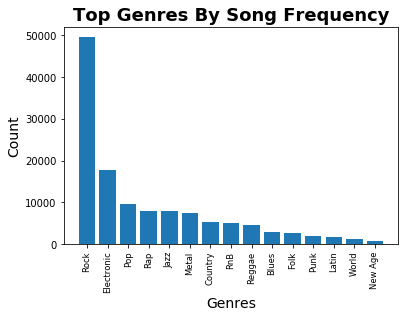

In [74]:
#plt.figure(figsize = (12,8))
plt.bar(range(15), np.ravel(res['count']), align='center')
plt.xticks(range(15), np.ravel(res['genre']), size='small')
plt.title('Top Genres By Song Frequency',fontweight="bold", fontsize=18)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)
plt.show()

# only select Rock genre samples

In [77]:
rock_df = final_df.loc[final_df['genre'] == 'Rock']
rock_df.reset_index(inplace=True, drop=True)
rock_df.drop('genre', axis = 1, inplace=True)
rock_df.head()

/mnt/usr-moved/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,track_id,year,artist_name,artist_id,song_title,song_beats_persecond,song_duration,song_end_fade_in,song_start_fade_out,song_key,...,timbre80,timbre81,timbre82,timbre83,timbre84,timbre85,timbre86,timbre87,timbre88,timbre89
0,TRCCCMQ128F42AE752,2006,Joe Satriani,ARNZ70R1187B9A4824,It's So Good,1.389052,254.85016,0.113,238.939,7,...,19.697000,3.334592,-5.095906,-17.352149,-1.111426,-3.731800,18.999957,-1.012594,3.487135,2.075860
1,TRCCCSX128F4289EE2,2007,Space Ritual,ARJMPGH11F4C8429C6,The Riddle,2.623150,407.14404,3.651,403.615,9,...,56.151785,0.022172,-25.532836,-22.344064,13.126395,0.696819,7.574604,3.805867,-3.526275,-1.163488
2,TRCCCNU128F92F527F,2008,3 Doors Down,ARW1MUW1187FB4D5A1,It's The Only One You've Got,2.116366,257.04444,0.356,245.696,9,...,25.036883,-7.972226,-8.311926,-6.975943,4.491166,-3.488112,-3.213598,-4.556991,-1.702068,11.655517
3,TRCCCYE12903CFF0E9,1991,The Nice,ARIY5ZP1187FB57964,Brandenburger,1.737656,264.72444,0.322,261.033,7,...,6.692804,-12.276633,-17.547442,-11.787692,9.381283,13.017714,-7.757836,7.752635,-2.949645,21.275893
4,TRCCZOW128F146A22D,1999,Marianne Faithfull,AR9FKRD1187B9B73D4,Great Expectations,1.238377,193.80200,0.421,183.281,11,...,-4.877986,-13.654021,-14.257267,-20.140851,5.335119,-9.126235,9.746358,0.141406,-2.212238,-15.133671


In [78]:
rock_df.shape

(49614, 200)

In [80]:
import sqlite3
engine = sqlite3.connect('GenreDB')
rock_df.to_sql('songs', engine, if_exists='replace', index = False)